In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Utilizando o arquivo com dados de temperatura do estado do Rio de Janeiro

In [2]:
df_rio = pd.read_csv("station_rio.csv", index_col=0)

Excluindo colunas 

In [3]:
df_rio.drop("D-J-F", axis=1, inplace=True)
df_rio.drop("M-A-M", axis=1, inplace=True)
df_rio.drop("J-J-A", axis=1, inplace=True)
df_rio.drop("S-O-N", axis=1, inplace=True)
df_rio.drop("metANN", axis=1, inplace=True)

Como substituir os valores "999.90" por NaN?

In [4]:
df_rio = df_rio.replace(999.90, np.nan)

Como substituir NaN por outro valor?

In [5]:
df_rio = df_rio.fillna(df_rio.mean())

Traduza o cabeçalho para português?

In [6]:
df_rio = df_rio.rename(columns = {"JAN": "janeiro", 
                                  "FEB": "fevereiro",
                                  "MAR": "marco",
                                  "APR": "abril",
                                  "MAY": "maio",
                                  "JUN": "junho",
                                  "JUL": "julho",
                                  "AUG": "agosto",
                                  "SEP": "setembro",
                                  "OCT": "outubro",
                                  "NOV": "novembro",
                                  "DEC": "dezembro",
                                  "YEAR": "ano"
                                 })

Quais as temperaturas médias, máximas e mínimas por ano?

In [7]:
df_rio["media_ano"] = df_rio.mean(axis=1)
df_rio["maximo_ano"] = df_rio.max(axis=1)
df_rio["minimo_ano"] = df_rio.min(axis=1)

Como definir se o ano foi quente, ameno ou frio?

In [8]:
def tipo(media):
    if media>24.5:
        return "quente"
    elif 23.5<media<=24.5:
        return "ameno"
    else:
        return "frio"

In [9]:
df_rio["tipo_ano"] = df_rio['media_ano'].apply(tipo)

Como filtrar os anos quentes da amostra?

In [10]:
print("Filtro para checar os anos mais quentes:", df_rio[df_rio["tipo_ano"] == "quente"])

Filtro para checar os anos mais quentes:         janeiro  fevereiro  marco  abril   maio  junho  julho  agosto  \
YEAR                                                                    
1984  28.560000  28.850000  26.54  24.46  24.77  22.91  22.20   21.00   
1994  27.313721  27.585854  26.56  24.97  23.95  21.16  21.59   20.85   
1995  28.640000  27.590000  26.75  24.97  23.17  21.84  23.06   23.90   
1998  28.570000  28.320000  27.72  26.03  22.89  20.59  21.30   23.21   
2001  28.250000  28.550000  27.83  27.17  23.24  22.67  21.32   22.23   
2002  27.040000  26.290000  27.72  26.34  23.38  23.08  21.27   23.49   
2009  26.320000  27.960000  26.55  24.21  23.16  20.71  21.21   21.88   
2012  25.870000  27.900000  26.57  25.29  22.25  22.67  21.67   22.07   
2014  28.990000  28.950000  27.59  25.99  23.29  22.84  21.44   22.64   
2015  29.930000  28.430000  26.78  25.93  23.18  21.98  22.93   23.53   
2016  27.080000  28.980000  27.43  27.93  22.93  20.53  21.53   23.23   
2017  28.9

Como filtrar os anos frios da amostra?

In [11]:
print("Filtro para checar os anos mais frios:", df_rio[df_rio["tipo_ano"] == "frio"])

Filtro para checar os anos mais frios:       janeiro  fevereiro  marco  abril   maio  junho  julho  agosto  setembro  \
YEAR                                                                            
1975    25.27      26.92  26.43  22.82  21.37  20.50  19.68   22.98     22.40   
1976    27.48      26.20  25.55  24.99  22.01  21.18  20.14   21.15     21.27   
1979    23.86      25.69  24.80  23.36  23.05  20.30  20.29   22.42     22.05   
1991    25.44      26.43  25.52  24.72  21.69  21.42  19.64   20.91     20.80   

      outubro  novembro  dezembro  media_ano  maximo_ano  minimo_ano tipo_ano  
YEAR                                                                           
1975    22.65     24.11     26.53  23.471667       26.92       19.68     frio  
1976    22.06     24.40     25.56  23.499167       27.48       20.14     frio  
1979    24.25     24.07     26.02  23.346667       26.02       20.29     frio  
1991    23.59     24.49     27.26  23.492500       27.26       19.64     f

Da amostra de anos quentes, como separar os mais quentes?

In [12]:
maximas = df_rio['maximo_ano'].max()
df_rio["tipo_maximo"] = pd.cut(df_rio["maximo_ano"], bins=[28, 28.5, 29, maximas], labels=["De boa", "Muito Quente", "Maçarico"])

<AxesSubplot:>

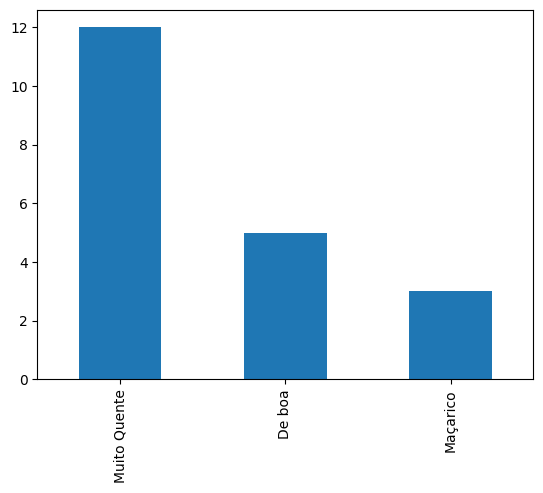

In [13]:
df_rio["tipo_maximo"].value_counts().plot.bar()

Quantidade de dias quentes, frios e amenos?

<AxesSubplot:>

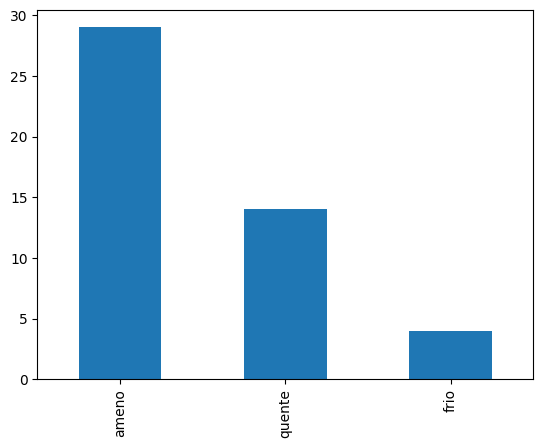

In [14]:
df_rio["tipo_ano"].value_counts().plot.bar()

Qual a temperatura média do tipo de ano?

In [15]:
tipo = df_rio.groupby("tipo_ano")
tipo["media_ano"].mean()

tipo_ano
ameno     24.099732
frio      23.452500
quente    24.885788
Name: media_ano, dtype: float64

Qual a temperatura mediana do tipo de ano?

In [16]:
print(tipo["media_ano"].agg(["median"]))

             median
tipo_ano           
ameno     24.124131
frio      23.482083
quente    24.809167


Como mostrar a media de tempratura em fahrenheit?

In [17]:
df_rio["temp_media_fahrenheit"] = df_rio["media_ano"] * 9/5 +32

Utilziando o Matplotlib

<AxesSubplot:xlabel='tipo_ano'>

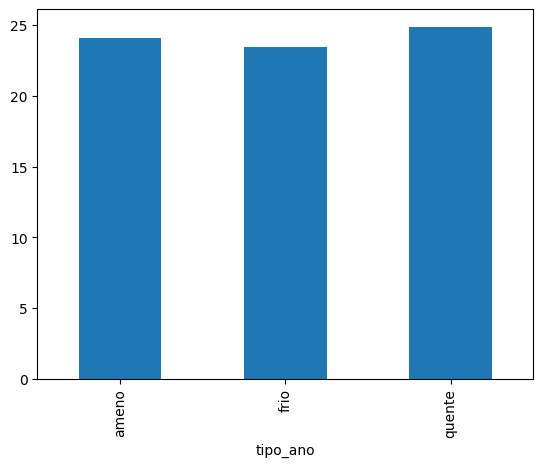

In [18]:
df_rio.groupby('tipo_ano').media_ano.mean().plot(kind='bar')

Como exportar um arqvuio CSV?

In [19]:
df_rio.to_csv("Temperatura Rio.csv")

In [20]:
df_rio

janeiro  fevereiro      marco      abril       maio      junho  \
YEAR                                                                     
1973  27.730000  27.970000  25.700000  26.490000  22.420000  22.760000   
1974  26.680000  27.160000  26.560000  23.940000  22.760000  20.700000   
1975  25.270000  26.920000  26.430000  22.820000  21.370000  20.500000   
1976  27.480000  26.200000  25.550000  24.990000  22.010000  21.180000   
1977  27.130000  28.510000  26.880000  24.220000  22.350000  22.130000   
1978  27.440000  26.550000  26.420000  23.390000  21.850000  20.030000   
1979  23.860000  25.690000  24.800000  23.360000  23.050000  20.300000   
1980  25.390000  27.240000  27.830000  24.630000  23.410000  21.200000   
1981  27.420000  28.060000  26.260000  23.850000  22.870000  20.940000   
1982  24.550000  27.510000  25.000000  22.730000  21.580000  22.440000   
1983  26.810000  27.630000  25.990000  24.080000  23.820000  21.180000   
1984  28.560000  28.850000  26.540000  24.460000  24.770000  22.910000   
1985  25.530000  27.585854  26.564318  25.121364  22.804651  21.581364   
1986  27.313721  27.930000  26.950000  25.970000  22.804651  22.700000   
1987  27.680000  27.250000  25.860000  25.850000  22.730000  20.480000   
1988  28.820000  26.030000  26.490000  24.650000  22.700000  19.740000   
1989  26.980000  26.590000  26.450000  25.430000  21.920000  20.900000   
1990  28.630000  27.470000  27.500000  27.050000  22.190000  21.500000   
1991  25.440000  26.430000  25.520000  24.720000  21.690000  21.420000   
1992  27.370000  27.585854  26.750000  24.630000  23.550000  23.310000   
1993  27.480000  27.250000  26.810000  25.680000  22.850000  20.980000   
1994  27.313721  27.585854  26.560000  24.970000  23.950000  21.160000   
1995  28.640000  27.590000  26.750000  24.970000  23.170000  21.840000   
1996  28.480000  28.170000  26.760000  25.090000  22.010000  21.160000   
1997  26.520000  28.030000  25.350000  24.570000  22.430000  21.530000   
1998  28.570000  28.320000  27.720000  26.030000  22.890000  20.590000   
1999  27.830000  27.960000  27.000000  24.690000  22.210000  21.250000   
2000  27.080000  26.890000  25.850000  24.950000  22.780000  21.940000   
2001  28.250000  28.550000  27.830000  27.170000  23.240000  22.670000   
2002  27.040000  26.290000  27.720000  26.340000  23.380000  23.080000   
2003  26.940000  27.585854  26.564318  25.121364  22.804651  21.581364   
2004  27.313721  27.585854  25.610000  25.420000  22.460000  21.500000   
2005  26.750000  26.120000  26.640000  26.090000  23.850000  22.410000   
2006  27.620000  27.600000  27.010000  24.880000  21.940000  21.390000   
2007  27.313721  27.585854  26.564318  25.121364  22.804651  21.581364   
2008  26.250000  26.540000  26.370000  25.280000  22.690000  21.590000   
2009  26.320000  27.960000  26.550000  24.210000  23.160000  20.710000   
2010  28.580000  29.100000  26.490000  24.590000  22.870000  20.350000   
2011  28.140000  28.690000  25.500000  25.480000  21.860000  20.520000   
2012  25.870000  27.900000  26.570000  25.290000  22.250000  22.670000   
2013  26.130000  28.180000  26.180000  24.200000  22.940000  22.590000   
2014  28.990000  28.950000  27.590000  25.990000  23.290000  22.840000   
2015  29.930000  28.430000  26.780000  25.930000  23.180000  21.980000   
2016  27.080000  28.980000  27.430000  27.930000  22.930000  20.530000   
2017  28.920000  28.270000  26.970000  25.520000  22.570000  21.970000   
2018  28.060000  27.210000  27.810000  26.260000  23.810000  22.910000   
2019  30.250000  28.050000  27.500000  26.550000  24.850000  23.100000   

          julho     agosto   setembro    outubro   novembro   dezembro  \
YEAR                                                                     
1973  22.140000  21.030000  21.460000  22.460000  23.060000  25.850000   
1974  21.200000  21.810000  22.910000  22.800000  24.510000  24.540000   
1975  19.680000  22.980000  22.400000  22.650000  24.110000  26.530000   
1976  20.14